/tmp/ipykernel_2123964/120096447.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{int(i)}' for i in cbar.get_ticks()], fontsize=10)


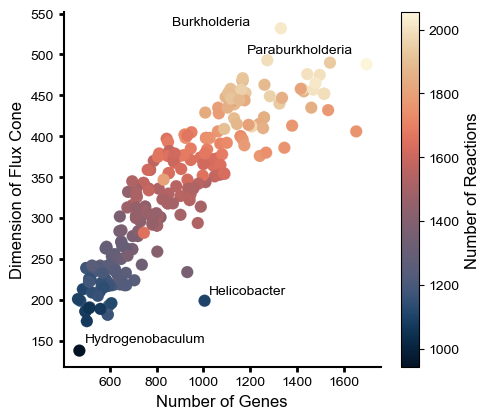

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"
import colormaps as cmaps

# Read data
summary = pd.read_csv('suppfig1.csv')
named = pd.read_csv('suppfig1_named.csv')
min_species = named.loc[named.number_of_genes == summary.number_of_genes.min()]
max_species = named.loc[named.number_of_genes == summary.number_of_genes.max()]

# Create scatter plot
textsize = 10
fig, ax = plt.subplots(1, 1, figsize=(5, 4.3))
scatter = plt.scatter(summary['number_of_genes'], summary['nullity'], 
                      c=summary['number_of_reactions'], 
                      cmap=cmaps.lipari, linewidth=0.1,
                      s=75)

# Add labels
ax.set_xlabel('Number of Genes', fontsize=12)
ax.set_ylabel('Dimension of Flux Cone', fontsize=12)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Reactions', fontsize=12)
cbar.set_ticklabels([f'{int(i)}' for i in cbar.get_ticks()], fontsize=10)

# Add text labels for specific points
specific = named.loc[named.nullity == named.nullity.min()].reset_index(drop=True)
plt.text(specific['number_of_genes'].values[0] * 1.05, 
         specific['nullity'].values[0] * 1.05, 
         specific.species[0].split(' ')[0], fontsize=textsize, ha='left', va='bottom')

specific = named.loc[named.nullity == named.nullity.max()].reset_index(drop=True)
plt.text(specific['number_of_genes'].values[0] * 0.65, 
         specific['nullity'].values[0] * 1.0, 
         specific.species[0].split(' ')[0], fontsize=textsize, ha='left', va='bottom')

specific = named.loc[named.nullity < 220].loc[named.number_of_genes > 1000].reset_index(drop=True)
plt.text(specific['number_of_genes'].values[0] * 1.02, 
         specific['nullity'].values[0] * 1.02, 
         specific.species[0].split(' ')[0], fontsize=textsize, ha='left', va='bottom')

specific = max_species.reset_index(drop=True)
plt.text(specific['number_of_genes'].values[0] * 0.7, 
         specific['nullity'].values[0] * 1.02, 
         specific.species[0].split(' ')[0], fontsize=textsize, ha='left', va='bottom')

# Style plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, labelsize=10)
ax.yaxis.set_tick_params(width=2, labelsize=10)

plt.tight_layout()
plt.show()